#### Calculate a reasonable LST value for every surface classification in ERA5 Dataset



In [2]:
#
import xarray as xr
import matplotlib.pyplot as plt

import sys

sys.path.append("../../")

from src.processing import windsat_datacube

# Files
ws_path = "../../data/raw/daily_windsat/"
telsem_path = "../../data/processed/WinsatEmiss/"


The windsat datacube has ERA5 surtep in it. we get the flags for surface class from telsem atlas

In [41]:
telsem_ds = xr.open_mfdataset(
    paths = "../../data/processed/WinsatEmiss/*.nc",
    engine="netcdf4",
    concat_dim="month",
    combine="nested"
)
telsem_ds = telsem_ds.roll(
    {
        "longitude_grid": 4 * 180
    }
)

sclass= telsem_ds.Surface_class1 # Surface class changes with month a lot .sel(month = 6)


---

We are interested in the surface class 1, from 1 to 5 we have the flags for vebetation (from forest to desert respectivelly) that we will assign to a smooth, 5-seps range of vegetation cover, from fully covered to bare soil.




In [42]:
# Create the lat-lon mask for the surface classes
masks =[]
for i in range(1,6,1):
    ncol = (i-1) // 3
    nrow = (i-1) % 3
    mask = sclass.where(sclass == i)
    masks.append(mask)


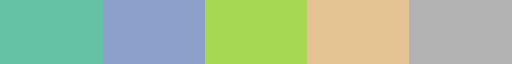

In [43]:
import matplotlib as mpl
cmap = mpl.colormaps.get_cmap("Set2").resampled(5)
cmap

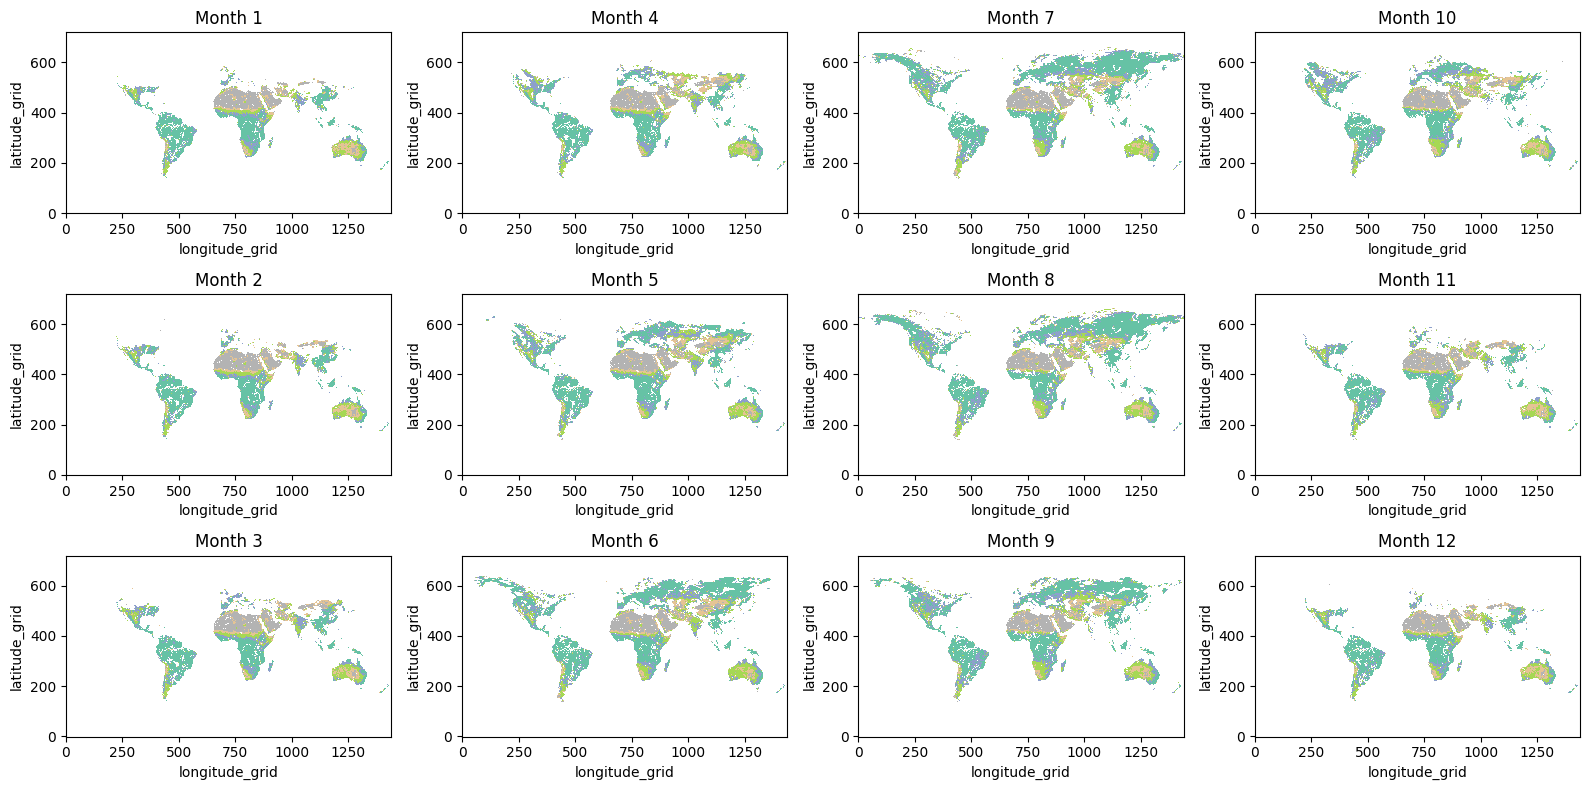

In [52]:
# Select all surface classes between 1 and 5 (1= Dense forest, 5 = dessert/ bare soil), akin to vegetation coverage or tau)
sclass = sclass.where(sclass <=5)

fig, axs = plt.subplots(3,4,figsize=(16,8))

for i in range(12): 
    nrow, ncol = i // 3, i % 3
    ax = axs[ncol, nrow]
    sclass.sel(month = i).plot(ax = ax, cmap = cmap, add_colorbar = False, alpha = 1)
    ax.set_title(f"Month {i + 1 }")
fig.tight_layout()

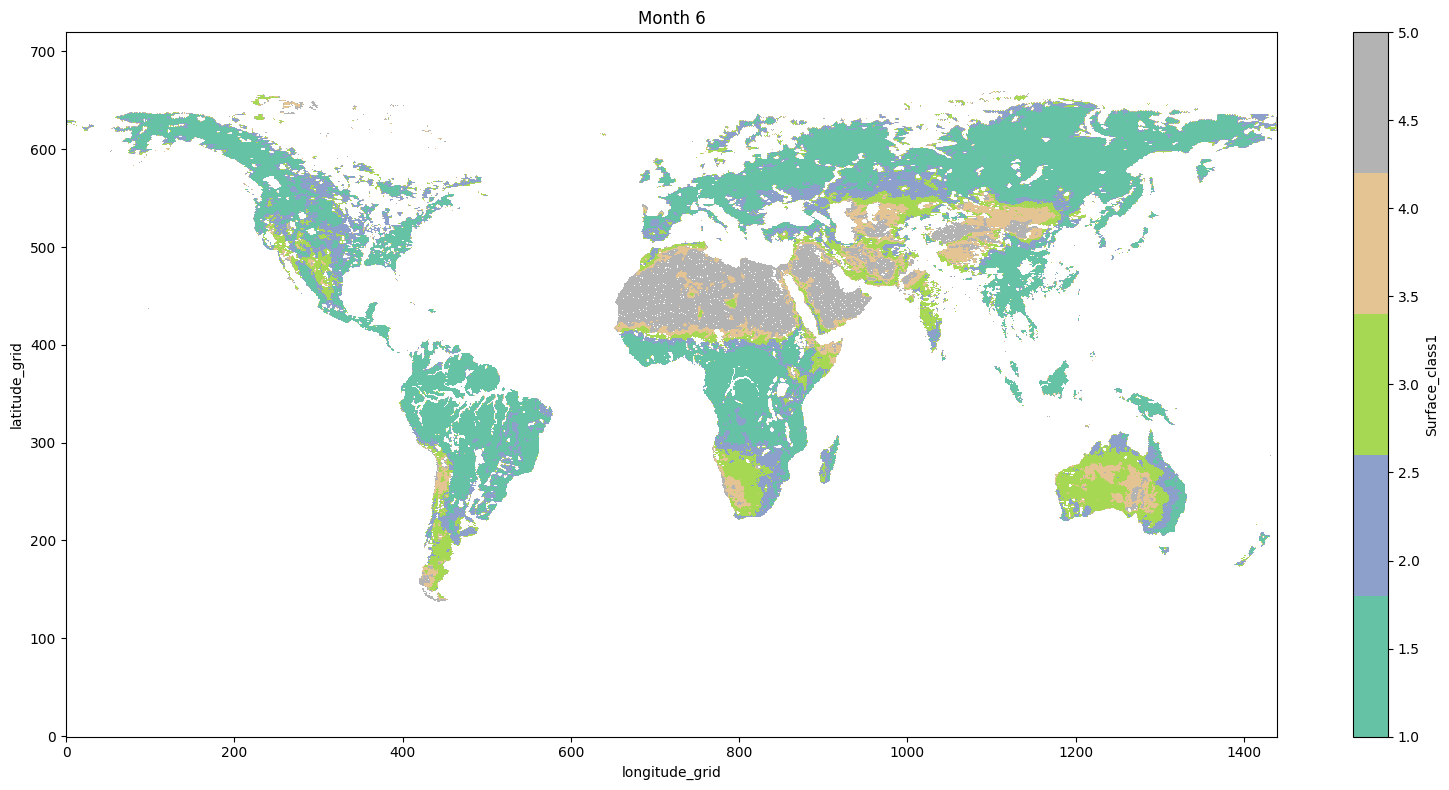

In [99]:
# For the month of June: 
fig, ax = plt.subplots(1,1,figsize=(16,8))

sclass.sel(month = 6).plot(ax = ax, cmap = cmap, add_colorbar = True, alpha = 1)
ax.set_title(f"Month 6")

fig.tight_layout()


In [7]:
# Load windsat dataset
ws_ds = windsat_datacube(ws_path)
ws_ds

<xarray.Dataset> Size: 3GB
Dimensions:         (day_number: 24, longitude_grid: 1440, latitude_grid: 720,
                     swath_sector: 2, frequency_band: 2, polarization: 2)
Coordinates:
    lat             (latitude_grid) float32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
    lon             (longitude_grid) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
  * day_number      (day_number) int32 96B 1 2 57 58 84 ... 283 323 324 348 349
Dimensions without coordinates: longitude_grid, latitude_grid, swath_sector,
                                frequency_band, polarization
Data variables: (12/13)
    longitude       (day_number, longitude_grid) float32 138kB dask.array<chunksize=(1, 1440), meta=np.ndarray>
    latitude        (day_number, latitude_grid) float32 69kB dask.array<chunksize=(1, 720), meta=np.ndarray>
    node            (day_number, swath_sector) int32 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    frequency_vpol  (day_number, frequency_band) float32 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    frequency_hpol  (day_number, frequency_band) float32 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    eia_nominal     (day_number, frequency_band) float32 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    ...              ...
    eaa             (day_number, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 398MB dask.array<chunksize=(1, 1, 360, 720, 1), meta=np.ndarray>
    eia             (day_number, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 398MB dask.array<chunksize=(1, 1, 360, 720, 1), meta=np.ndarray>
    tbtoa           (day_number, polarization, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 796MB dask.array<chunksize=(1, 1, 1, 240, 480, 1), meta=np.ndarray>
    quality_flag    (day_number, latitude_grid, longitude_grid, swath_sector) int32 199MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    surtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 199MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    airtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 199MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
Attributes: (12/72)
    Conventions:                            CF-1.7
    title:                                  RSS WindSat TOA Brightness Temper...
    version:                                V01.0
    summary:                                The dataset contains RSS WindSat ...
    references:                              [1] T. Meissner et al., Remote S...
    acknowledgement:                        Funded under NASA Grant 80NSSC21K...
    ...                                     ...
    Source_of_ancillary_IMERG_rain_rate:    Huffman, G. et al.,  2019. NASA G...
    Source_of_ancillary_CCMP_wind:          Mears, C. et al., 2023.Remote Sen...
    Source_of_ancillary_ERA5:               ECMWF Reanalysis v5 (ERA5). https...
    Source_of_RSS_WindSat_AS_ECV:           https://www.remss.com/missions/wi...
    Source_of_ancillary_HYCOM_SSS:          Hybrid Coordinate Ocean Model, Gl...
    Source_of_WindSat_L1C_TB:               T. Meissner et al., Remote Sensin...

In [66]:
sclass

<xarray.DataArray 'Surface_class1' (month: 12, latitude_grid: 720,
                                    longitude_grid: 1440)> Size: 100MB
dask.array<where, shape=(12, 720, 1440), dtype=float64, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
    lat      (latitude_grid) float32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
    lon      (longitude_grid) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
Dimensions without coordinates: month, latitude_grid, longitude_grid

In [67]:
# add surface class to ws dataset
ws_ds["Surface Class 1"] = (("month","latitude_grid","longitude_grid"), sclass.values)

In [71]:
ws_ds.where(ws_ds["Surface Class 1"] == 1).surtep_ERA5.mean().values

array(285.5705, dtype=float32)

In [74]:
sclass_mean = {}
for i in range(1,6,1):
    sub_ds = ws_ds.where(ws_ds["Surface Class 1"] == i)
    mean_lst = sub_ds.surtep_ERA5.mean()
    sclass_mean[i] = mean_lst.values
    print(f"Surface Class {i} - Mean surtep_ERA5: {mean_lst.values}")

Surface Class 1 - Mean surtep_ERA5: 285.57049560546875
Surface Class 2 - Mean surtep_ERA5: 286.7828369140625
Surface Class 3 - Mean surtep_ERA5: 289.2742614746094
Surface Class 4 - Mean surtep_ERA5: 289.9043884277344
Surface Class 5 - Mean surtep_ERA5: 295.3345031738281


# TODO: 
### Run this with the whole year, or with a more homogenious sample of the whole year

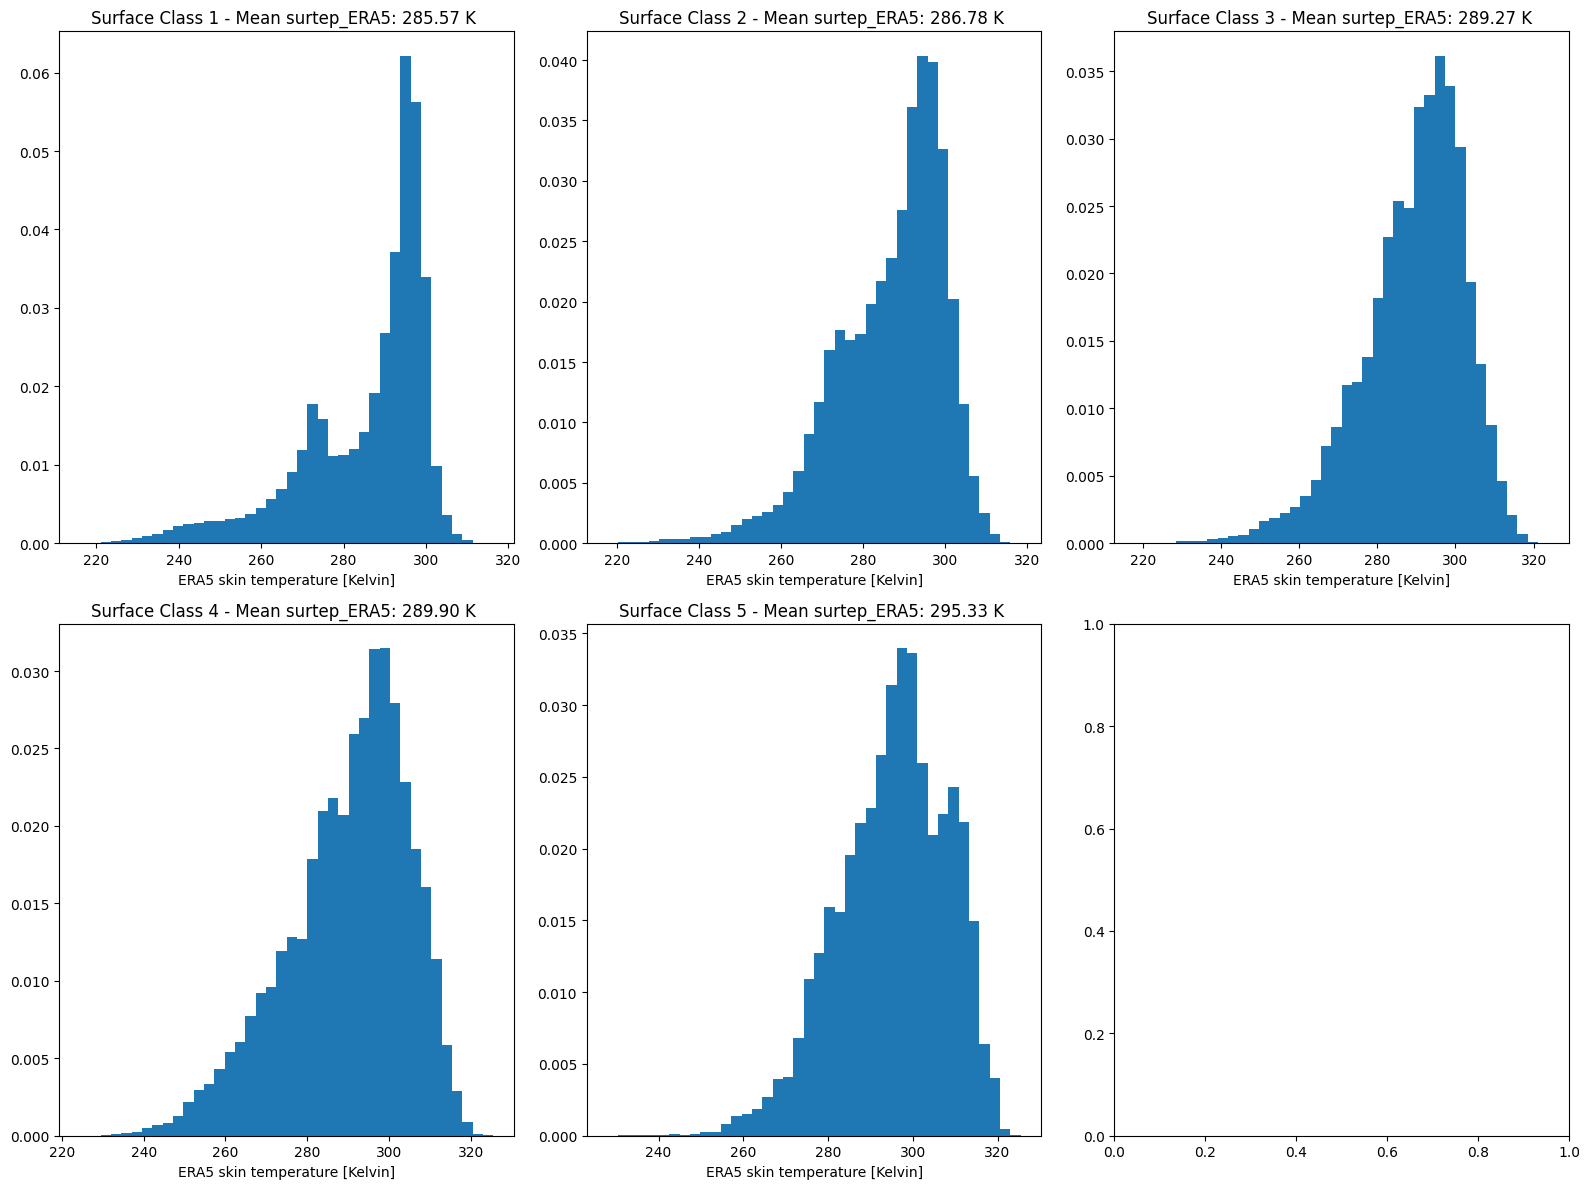

In [82]:
# Create histograms for each land class, not only the mean value

fig, axs = plt.subplots(2,3, figsize = (16,12))

for i in range(0,5,1):
    nrow, ncol = i // 3, i % 3
    sub_ds = ws_ds.where(ws_ds["Surface Class 1"] == i+1)
    title = f"Surface Class {i+1} - Mean surtep_ERA5: {sclass_mean[i+1]:.2f} K "
    ax = axs[nrow, ncol]
    sub_ds.surtep_ERA5.plot.hist(
        ax=ax, density = True, label = f"SC {i+1}",
        bins = 40
    )
    ax.set_title(title)

fig.tight_layout()


In [92]:
cmap.colors[0]
mpl.colors.rgb2hex(cmap.colors[0])

'#66c2a5'

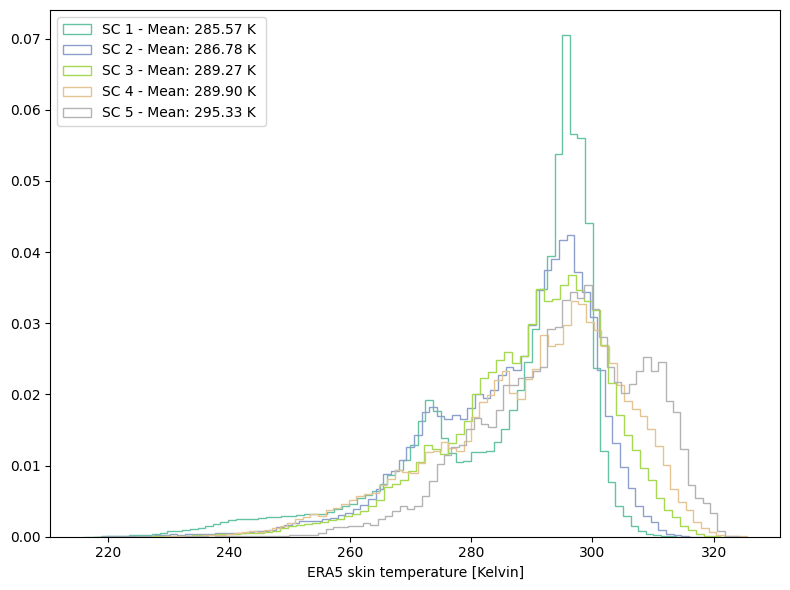

In [94]:
# Combined histogram:
fig, ax = plt.subplots(1,1, figsize = (8,6))

for i in range(5):
    sub_ds = ws_ds.where(ws_ds["Surface Class 1"] == i+1)
    label = f"SC {i +1} - Mean: {sclass_mean[i+1]:.2f} K "

    color =  mpl.colors.rgb2hex(cmap.colors[i])
    sub_ds.surtep_ERA5.plot.hist(
        ax=ax, density = True, label = label,
        bins = 80, alpha = 1, histtype = "step", color =color,
    )
    ax.legend(loc = "upper left")

fig.tight_layout()
